In [16]:
import tensorflow as tf 
import numpy as np      
import matplotlib.pyplot as plt

In [77]:
# 입력값 설정
idx2char = ['h','i','e','l','o']
# 원래 문장은 hihello 인데, 연속된 문장을 예측해보자. ihell
# x_data = [[0,1,0,2,3,3]] # hihello
y_data = [[1,0,2,3,3,4]]

In [78]:
num_classes = 5
input_dim = 5
sequence_length = 6
learning_late = 0.1

In [79]:
x_one_hot = np.array([[[1, 0, 0, 0, 0],    # h 0
                       [0, 1, 0, 0, 0],    # i 1
                       [1, 0, 0, 0, 0],    # h 0
                       [0, 0, 1, 0, 0],    # e 2
                       [0, 0, 0, 1, 0],    # l 3
                       [0, 0, 0, 1, 0]]],  # l 3
                     dtype=np.float32)

In [80]:
y_one_hot = tf.keras.utils.to_categorical(y_data, num_classes=num_classes)
print(x_one_hot.shape)
print(y_one_hot.shape)

(1, 6, 5)
(1, 6, 5)


In [81]:
tf.model = tf.keras.Sequential()

In [82]:
# cell, RNN layer 생성 
cell = tf.keras.layers.LSTMCell(units = num_classes, input_shape=(sequence_length, input_dim))
tf.model.add(tf.keras.layers.RNN(cell=cell, return_sequences=True))

In [83]:
# 하나의 LSTM은 LSTMCell을 만드는 대신 하나의 LSTM Layer로 만들어 사용할 수 있다.
tf.model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=num_classes, activation='softmax')))
tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=learning_late),
                metrics=['accuracy'])

In [84]:
tf.model.fit(x_one_hot, y_one_hot, epochs=50)

Train on 1 samples
Epoch 1/50
1/1 [==============================] - 0s 3ms/sample - loss: 1.6551 - acc: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 2ms/sample - loss: 1.5497 - acc: 0.3333
Epoch 3/50
1/1 [==============================] - 0s 997us/sample - loss: 1.4888 - acc: 0.3333
Epoch 4/50
1/1 [==============================] - 0s 996us/sample - loss: 1.4506 - acc: 0.3333
Epoch 5/50
1/1 [==============================] - 0s 1ms/sample - loss: 1.4090 - acc: 0.3333
Epoch 6/50
1/1 [==============================] - 0s 2ms/sample - loss: 1.3397 - acc: 0.3333
Epoch 7/50
1/1 [==============================] - 0s 2ms/sample - loss: 1.2372 - acc: 0.3333
Epoch 8/50
1/1 [==============================] - 0s 997us/sample - loss: 1.1148 - acc: 0.6667
Epoch 9/50
1/1 [==============================] - 0s 2ms/sample - loss: 0.9977 - acc: 0.6667
Epoch 10/50
1/1 [==============================] - 0s 2ms/sample - loss: 0.8970 - acc: 0.6667
Epoch 11/50
1/1 [=======================

In [85]:
tf.model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rnn_1 (RNN)                  multiple                  220       
_________________________________________________________________
time_distributed_5 (TimeDist multiple                  30        
Total params: 250
Trainable params: 250
Non-trainable params: 0
_________________________________________________________________


In [86]:
predictions = tf.model.predict(x_one_hot)
for i, prediction in enumerate(predictions):
    print(prediction)
    
    result_str = [idx2char[c] for c in np.argmax(prediction, axis=1)]
    print("\tPrediction str: ",''.join(result_str))

[[6.64934050e-04 9.95603204e-01 3.68704274e-03 2.85237711e-05
  1.62241849e-05]
 [9.97335017e-01 1.76767167e-03 1.27182328e-04 4.38656658e-04
  3.31350137e-04]
 [2.39708679e-05 1.34441175e-03 9.95664060e-01 2.96689314e-03
  7.11877703e-07]
 [8.34126840e-05 2.93932175e-07 3.32582532e-03 9.96489167e-01
  1.01274825e-04]
 [1.29937296e-04 2.98258982e-07 1.63428791e-04 9.97357190e-01
  2.34905374e-03]
 [1.03832943e-04 1.66627990e-06 6.87766644e-09 4.76894435e-03
  9.95125592e-01]]
	Prediction str:  ihello


### 문자열 rnn 적용( charecter seq rnn )

In [24]:
sample = " if you want you"
idx2char = list(set(sample))
char2idx = {c: i for i , c in enumerate(idx2char)}

In [25]:
dic_size = len(char2idx)
hidden_size = len(char2idx)
num_classes = len(char2idx)
batch_size =1
sequence_length = len(sample) -1
learning_late = 0.1

In [26]:
sample_idx = [char2idx[c] for c in sample]
x_data = [sample_idx[:-1]]
y_data = [sample_idx[1:]]

In [27]:
x_one_hot_eager = tf.one_hot(x_data, num_classes)
x_one_hot_numpy = tf.keras.utils.to_categorical(x_data, num_classes)
y_one_hot_eager = tf.one_hot(y_data, num_classes)

In [32]:
tf.model = tf.keras.Sequential()
# single LSTM일 경우엔 cell을 추가하지 않고 Single layer로 바로 생성 가능.
tf.model.add(tf.keras.layers.LSTM(units= num_classes, input_shape=(sequence_length, x_one_hot_eager.shape[2]), return_sequences=True))
tf.model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=num_classes, activation = 'softmax')))
tf.model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 15, 10)            840       
_________________________________________________________________
time_distributed_4 (TimeDist (None, 15, 10)            110       
Total params: 950
Trainable params: 950
Non-trainable params: 0
_________________________________________________________________


In [36]:
tf.model.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(lr=learning_late),
                metrics=['accuracy'])
tf.model.fit(x_one_hot_eager, y_one_hot_eager, steps_per_epoch=50)

Train on 50 samples
50/50 [==============================] - 0s 3ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.3068 - acc: 0.9160


In [38]:
predictions = tf.model.predict(x_one_hot_eager, steps=10)

In [39]:
for i, prediction in enumerate(predictions):
    result_str = [idx2char[c] for c in np.argmax(prediction, axis=1)]
    print("\tPrediction str: ", ''.join(result_str))

	Prediction str:  if you want you
	Prediction str:  if you want you
	Prediction str:  if you want you
	Prediction str:  if you want you
	Prediction str:  if you want you
	Prediction str:  if you want you
	Prediction str:  if you want you
	Prediction str:  if you want you
	Prediction str:  if you want you
	Prediction str:  if you want you


### 문장 rnn 적용(long char rnn)

In [41]:
sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

In [43]:
char_set = list(set(sentence))
char_dic = {w: i for i , w in enumerate(char_set)}

In [44]:
data_dim = len(char_set)
hidden_size = len(char_set)
num_classes = len(char_set)
sequence_length = 10
learning_late = 0.1

In [45]:
# 데이터 리스트 초기화 
dataX = []
dataY = []

In [49]:
for i in range(0, len(sentence) - sequence_length): 
    x_str = sentence[i:i+sequence_length]
    y_str = sentence[i+1 : i + sequence_length + 1] # 뒤에 어떤 문자가 나올지 예측 
    print(i, x_str, '->', y_str)
    
    x = [char_dic[c] for c in x_str]
    y = [char_dic[c] for c in y_str]
    
    dataX.append(x)
    dataY.append(y)
    
batch_sizeh = len(dataX)


0 if you wan -> f you want
1 f you want ->  you want 
2  you want  -> you want t
3 you want t -> ou want to
4 ou want to -> u want to 
5 u want to  ->  want to b
6  want to b -> want to bu
7 want to bu -> ant to bui
8 ant to bui -> nt to buil
9 nt to buil -> t to build
10 t to build ->  to build 
11  to build  -> to build a
12 to build a -> o build a 
13 o build a  ->  build a s
14  build a s -> build a sh
15 build a sh -> uild a shi
16 uild a shi -> ild a ship
17 ild a ship -> ld a ship,
18 ld a ship, -> d a ship, 
19 d a ship,  ->  a ship, d
20  a ship, d -> a ship, do
21 a ship, do ->  ship, don
22  ship, don -> ship, don'
23 ship, don' -> hip, don't
24 hip, don't -> ip, don't 
25 ip, don't  -> p, don't d
26 p, don't d -> , don't dr
27 , don't dr ->  don't dru
28  don't dru -> don't drum
29 don't drum -> on't drum 
30 on't drum  -> n't drum u
31 n't drum u -> 't drum up
32 't drum up -> t drum up 
33 t drum up  ->  drum up p
34  drum up p -> drum up pe
35 drum up pe -> rum up peo
36

In [50]:
X_one_hot = tf.one_hot(dataX, num_classes)
Y_one_hot = tf.one_hot(dataY, num_classes)

In [51]:
print(X_one_hot.shape)
print(Y_one_hot.shape)

(340, 10, 25)
(340, 10, 25)


In [53]:
tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.LSTM(units=num_classes, input_shape=(sequence_length, X_one_hot.shape[2]), return_sequences=True))
tf.model.add(tf.keras.layers.LSTM(units=num_classes, return_sequences=True))
tf.model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10, 25)            5100      
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 25)            5100      
Total params: 10,200
Trainable params: 10,200
Non-trainable params: 0
_________________________________________________________________


In [55]:
tf.model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=learning_late),
                metrics=['accuracy'])
tf.model.fit(X_one_hot, Y_one_hot, steps_per_epoch=100)

Train on 100 samples
100/100 [==============================] - 1s 12ms/step - batch: 49.5000 - size: 1.0000 - loss: 9.4319 - acc: 0.0825


In [57]:
results = tf.model.predict(X_one_hot, steps=10)
for j, result in enumerate(results):
    index = np.argmax(result, axis=1)
    if j is 0:
        print(''.join([char_set[t] for t in index]), end ='')
    else:
        print(char_set[index[-1]], end='')

   maaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa

### 주식 데이터 RNN 적용

In [65]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

In [66]:
# train parameter
seq_length = 7
data_dim = 5
ouput_dim = 1
learning_late = 0.01
iterations = 500

In [67]:
xy = np.loadtxt('./data/data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]

In [68]:
train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size] # 70%만 train set으로 사용하자.
test_set = xy[train_size - seq_length:] # 나머지는 30%로

In [69]:
# 정규화
train_set  = MinMaxScaler(train_set)
test_set = MinMaxScaler(test_set)

In [70]:
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    
    for i in range(0, len(time_series)-seq_length):
        x = time_series[i: i + seq_length, :]
        y = time_series[i + seq_length, [-1]] # Next close price
        print(x , "->", y)
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [71]:
trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

[[2.53065030e-01 2.45070970e-01 2.33983036e-01 4.66075110e-04
  2.32039560e-01]
 [2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.78314566e-01 1.98470380e-01 5.70171193e-01
  1.78104644e-01]] -> [0.16053716]
[[2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.7831

 [0.22694782 0.22588009 0.2444006  0.14662544 0.2332716 ]] -> [0.2733356]
[[0.19424085 0.20713175 0.20921002 0.14636551 0.2181333 ]
 [0.19686278 0.1967536  0.21636978 0.16111858 0.2052128 ]
 [0.19958837 0.21710131 0.2127899  0.19060679 0.23570078]
 [0.22335965 0.22057201 0.24552831 0.10659676 0.23038477]
 [0.23115678 0.22370242 0.25592791 0.23383526 0.23872853]
 [0.22694782 0.22588009 0.2444006  0.14662544 0.2332716 ]
 [0.23429646 0.2674943  0.2636604  0.2308237  0.2733356 ]] -> [0.23318369]
[[0.19686278 0.1967536  0.21636978 0.16111858 0.2052128 ]
 [0.19958837 0.21710131 0.2127899  0.19060679 0.23570078]
 [0.22335965 0.22057201 0.24552831 0.10659676 0.23038477]
 [0.23115678 0.22370242 0.25592791 0.23383526 0.23872853]
 [0.22694782 0.22588009 0.2444006  0.14662544 0.2332716 ]
 [0.23429646 0.2674943  0.2636604  0.2308237  0.2733356 ]
 [0.26169032 0.25956622 0.25481816 0.19219324 0.23318369]] -> [0.2204569]
[[0.19958837 0.21710131 0.2127899  0.19060679 0.23570078]
 [0.22335965 0.22057201

 [0.78716413 0.78607772 0.7671635  0.46256162 0.75852662]] -> [0.67248474]
[[0.78512848 0.80884121 0.80471657 0.2391772  0.83932294]
 [0.81724899 0.8472907  0.85644609 0.31069284 0.88153412]
 [0.88255911 0.89108232 0.91540707 0.45991754 0.91339492]
 [1.         1.         0.99194524 0.56827104 0.95792978]
 [0.95073266 0.94770185 0.8338928  0.5523976  0.82520556]
 [0.78716413 0.78607772 0.7671635  0.46256162 0.75852662]
 [0.72181947 0.70778356 0.68944413 0.45691494 0.67248474]] -> [0.66956263]
[[0.81724899 0.8472907  0.85644609 0.31069284 0.88153412]
 [0.88255911 0.89108232 0.91540707 0.45991754 0.91339492]
 [1.         1.         0.99194524 0.56827104 0.95792978]
 [0.95073266 0.94770185 0.8338928  0.5523976  0.82520556]
 [0.78716413 0.78607772 0.7671635  0.46256162 0.75852662]
 [0.72181947 0.70778356 0.68944413 0.45691494 0.67248474]
 [0.59754727 0.63986753 0.62826363 0.37998566 0.66956263]] -> [0.65326254]
[[0.88255911 0.89108232 0.91540707 0.45991754 0.91339492]
 [1.         1.      

 [0.73556749 0.71871485 0.72647323 0.10188412 0.69762856]] -> [0.6841287]
[[0.7539117  0.74476875 0.78747919 0.06319536 0.76554563]
 [0.74839655 0.73313303 0.75009993 0.11604763 0.75443527]
 [0.72753424 0.71335103 0.75906629 0.07139529 0.73472325]
 [0.718782   0.70993212 0.75119072 0.00696994 0.726659  ]
 [0.71746295 0.74011187 0.75347437 0.03785013 0.7364554 ]
 [0.73556749 0.71871485 0.72647323 0.10188412 0.69762856]
 [0.67340098 0.66979068 0.70054403 0.02910975 0.6841287 ]] -> [0.61860112]
[[0.74839655 0.73313303 0.75009993 0.11604763 0.75443527]
 [0.72753424 0.71335103 0.75906629 0.07139529 0.73472325]
 [0.718782   0.70993212 0.75119072 0.00696994 0.726659  ]
 [0.71746295 0.74011187 0.75347437 0.03785013 0.7364554 ]
 [0.73556749 0.71871485 0.72647323 0.10188412 0.69762856]
 [0.67340098 0.66979068 0.70054403 0.02910975 0.6841287 ]
 [0.66992387 0.65122326 0.64898883 0.21882629 0.61860112]] -> [0.70413968]
[[0.72753424 0.71335103 0.75906629 0.07139529 0.73472325]
 [0.718782   0.7099321

In [72]:
tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.LSTM(units=1, input_shape=(seq_length, data_dim)))
tf.model.add(tf.keras.layers.Dense(units=ouput_dim, activation = 'tanh'))
tf.model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 1)                 28        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 2         
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [73]:
tf.model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(lr=learning_late))
tf.model.fit(trainX, trainY, epochs=iterations, steps_per_epoch=50)

Train on 50 samples
Epoch 1/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0576
Epoch 2/500
50/50 [==============================] - 0s 3ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0078
Epoch 3/500
50/50 [==============================] - 0s 3ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0049
Epoch 4/500
50/50 [==============================] - 0s 3ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0040
Epoch 5/500
50/50 [==============================] - 0s 3ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0035
Epoch 6/500
50/50 [==============================] - 0s 3ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0032
Epoch 7/500
50/50 [==============================] - 0s 3ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0029
Epoch 8/500
50/50 [==============================] - 0s 3ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0027
Epoch 9/500
50/50 [==============================] - 0s 3ms/step - batch: 24.5000 - 

50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0012
Epoch 73/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0012
Epoch 74/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0012
Epoch 75/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0012
Epoch 76/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0012
Epoch 77/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0012
Epoch 78/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0012
Epoch 79/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0012
Epoch 80/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0

50/50 [==============================] - 0s 3ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 145/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 146/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 147/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 148/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 149/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 150/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 151/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 152/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - l

50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 215/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 216/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 217/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 218/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 219/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 220/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 221/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 222/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - l

Epoch 286/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 287/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 288/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 289/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 290/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 291/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 292/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 293/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 294/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - si

50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 358/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 359/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 360/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 361/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 362/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 363/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 364/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 365/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - l

Epoch 429/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 430/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 431/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 432/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 433/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 434/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 435/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 436/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011
Epoch 437/500
50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - si

50/50 [==============================] - 0s 2ms/step - batch: 24.5000 - size: 1.0000 - loss: 0.0011


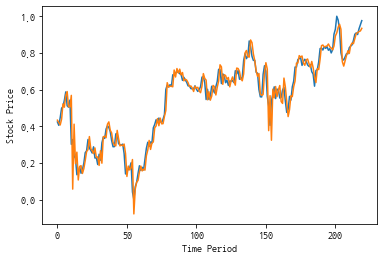

In [76]:
# Test step
test_predict = tf.model.predict(testX)

# plt predictions
plt.plot(testY)
plt.plot(test_predict)
plt.xlabel('Time Period')
plt.ylabel('Stock Price')
plt.show()

예측값과 실제값 그래프 출력